In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
a1 = np.array([[1,23,4],[3,9,10]])
a2 = np.array([[14,2,6],[5,2,14]])
print(a1)
print(a2)

[[ 1 23  4]
 [ 3  9 10]]
[[14  2  6]
 [ 5  2 14]]


In [76]:
a3 = np.c_[a1,a2] #Perform a horizontal stack concatenation.
print(a3)

[[ 1 23  4 14  2  6]
 [ 3  9 10  5  2 14]]


In [77]:
h = np.hstack((a1,a2))
print(h,h.shape)

[[ 1 23  4 14  2  6]
 [ 3  9 10  5  2 14]] (2, 6)


In [78]:
v = np.vstack((a1,a2))
print(v,v.shape)

[[ 1 23  4]
 [ 3  9 10]
 [14  2  6]
 [ 5  2 14]] (4, 3)


In [79]:
housing = pd.read_csv('D:/pandas Practice/housing.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [80]:
#Randomly sample a train and test set with '80-20' split.
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size=0.2,random_state=22)
train_set.shape , test_set.shape 
#Instead of specifying 'X' and 'y' arguments, we gave the whole 'housing' data as argument.
#The function thus gives 2 splits giving us 'train_set' and 'test_set' datasets.
#If we specify 'X' and 'y' as arguments, we'll get 'X_train','X_test','y_train' and 'y_test' as outputs.
#These can then be used by a regression algorithm to fit a model.

((16512, 10), (4128, 10))

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

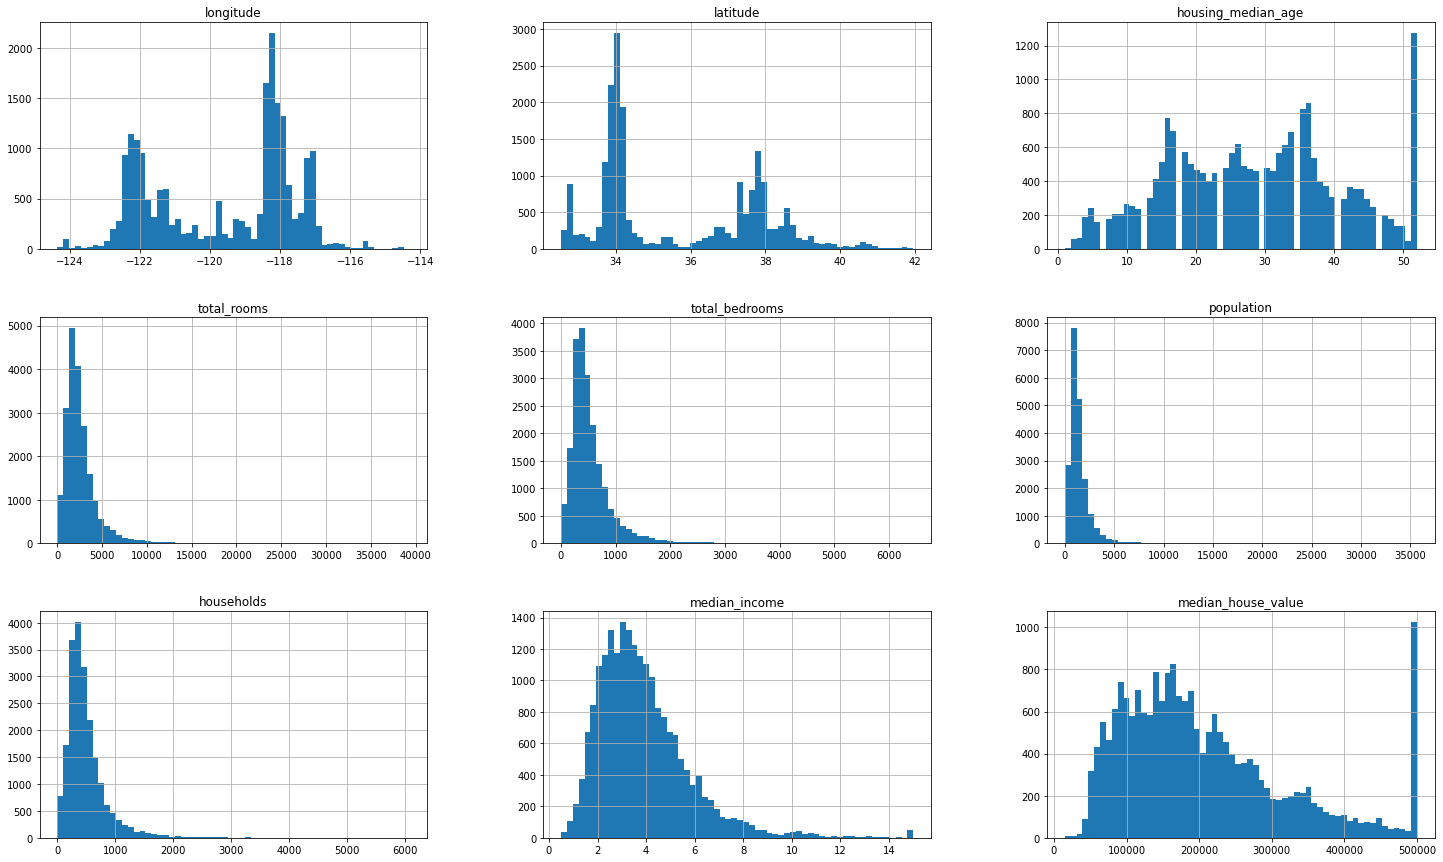

In [81]:
plt.rcParams['figure.figsize']=(25,15) #Set the figure size to a specified length,breadth.
housing.hist(bins=60)

<AxesSubplot:>

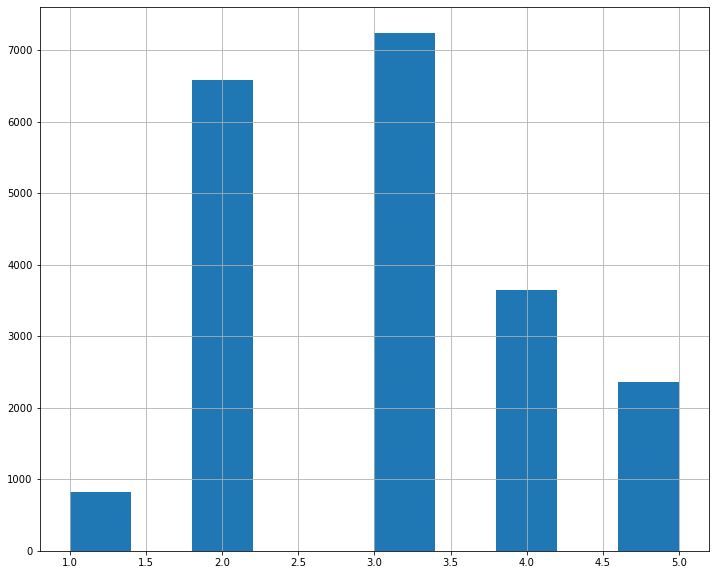

In [82]:
housing['income_cat'] = pd.cut(housing['median_income'],bins = [0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])
housing['income_cat'].hist(figsize=(12,10))

In [83]:
#Perform stratified sampling to ensure the proportions in a specific categorical column are preserved while splitting.
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in splitter.split(housing,housing['income_cat']):
    strat_train = housing.loc[train_index]
    strat_test = housing.loc[test_index]
print(strat_train['income_cat'].value_counts()/len(strat_train))
print(strat_test['income_cat'].value_counts()/len(strat_test))

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64
3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


In [84]:
players = pd.read_excel('D:/pandas Practice/random.xlsx')
players.head(3)

,Name,Age,Fit
0,Auba,31,Yes
1,Laca,29,Yes
2,Saka,20,No


In [85]:
#A simpler illustration of stratified sampling.
#We want that our split(50-50 coz its a small data) should have equal proportion of levels of 'Fit' column.
split1 = StratifiedShuffleSplit(n_splits=1,test_size=0.5,random_state=12)
for tr_index,ts_index in split1.split(players,players['Fit']): #Provide the 'X' data and the 'y' column to be preserved.
    tr_set = players.loc[tr_index]
    ts_set = players.loc[ts_index]
print(tr_set['Fit'].value_counts()/len(tr_set))
print(ts_set['Fit'].value_counts()/len(ts_set))
#As seen, the proportion of 'Fit' values is maintained after split.

Yes    0.6
No     0.4
Name: Fit, dtype: float64
Yes    0.6
No     0.4
Name: Fit, dtype: float64


array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

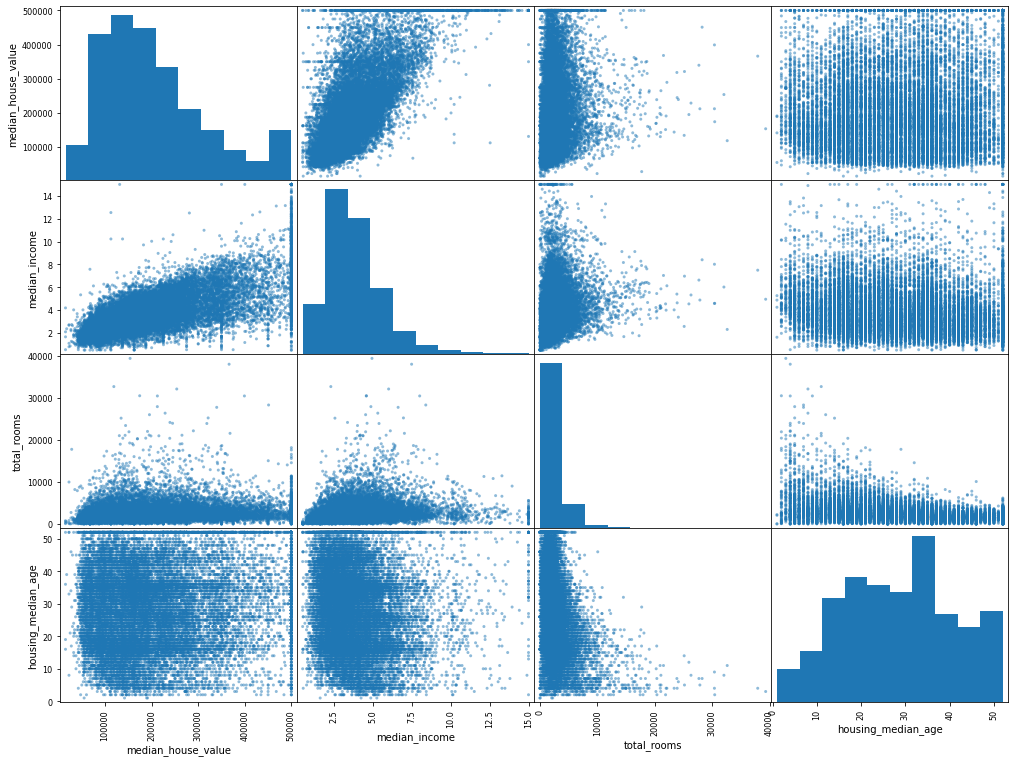

In [86]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[['median_house_value','median_income','total_rooms','housing_median_age']],figsize=(17,12.8))

In [87]:
#Get correlation coefficient b/w 'median_house_value' and rest of numeric columns.
correlation = housing.corr()
correlation['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [88]:
y_train = strat_train['median_house_value'].copy()
X_train = strat_train.drop('median_house_value',axis=1)
X_train.shape , y_train.shape

((16512, 10), (16512,))

In [97]:
y_test = strat_test['median_house_value'].copy()
X_test = strat_test.drop('median_house_value',axis=1)
X_test.shape , y_test.shape

((4128, 10), (4128,))

In [89]:
#Remove categorical column.
X_num = X_train.drop('ocean_proximity',axis=1)

In [90]:
#Create a pipeline which has functions to be applied to all columns of the dataset.
#Here the output of first function in the pipe becomes the input for the second function. 
#Hence its a sequence of operations performed on the whole data as specified in the pipeline.
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([('imputer',KNNImputer(n_neighbors=3)),('std_scaler',StandardScaler())])
X_new = pipe.fit_transform(X_num)
housing_std = pd.DataFrame(X_new,columns=X_num.columns,index=X_num.index)
housing_std.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
17606,-1.156043,0.771950,0.743331,-0.493234,-0.445722,-0.636211,-0.420698,-0.614937,-0.954456
18632,-1.176025,0.659695,-1.165317,-0.908967,-1.034889,-0.998331,-1.022227,1.336459,1.890305
14650,1.186849,-1.342183,0.186642,-0.313660,-0.154775,-0.433639,-0.093318,-0.532046,-0.954456


In [91]:
#Since we also have categorical column in data, we now will use 'ColumnTransformer'. 
#We'll include 'OneHotEncoder' with the pre-made pipeline.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_cols = list(X_num) #List of numeric columns.
cat_cols = ['ocean_proximity'] #List of categoric columns.
full_pipe = ColumnTransformer([('step1',pipe,num_cols),('step2',OneHotEncoder(sparse=False,drop='first'),cat_cols)])
X_train_final = full_pipe.fit_transform(X_train)
X_train_final.shape

(16512, 13)

In [92]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_final,y_train)

LinearRegression()

In [93]:
X_test_final = full_pipe.transform(strat_test)
X_test_final.shape

C:\Users\win\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


(4128, 13)

In [103]:
print('Predicted:', model.predict(X_test_final).round(2))
print('Actual:',y_test.values.round(2))

Predicted: [414568.15 268127.23 231373.84 ... 293948.85 192599.84 131806.72]
Actual: [500001. 240300. 218200. ... 311700. 133500.  78600.]
